### Project domain: Swiggy
### Project Title: South-indian Restaurents

#### Use case

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for webscraping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import re
import warnings 

In [4]:
import warnings 
warnings.filterwarnings("ignore")

### Web Scraping

In [5]:
%%time
# creating Empty Lists :-
Name=[]
Cuisine=[]
Delivery_time=[]
location = []
city=["vijayawada",'hyderabad',"kochi",'delhi','mumbai','chennai','bengaluru','kolkata','pune','varanasi']
#Extracting the pages from 1 to 10:-
for j in city:
    for i in range(1,10):
        url="https://www.swiggy.com/"+str(j)+"/south-indian-collection?page="+str(i)
        page=requests.get(url)
        content=page.content
        soup=BeautifulSoup(content,"html.parser")
        #
        top_rest = soup.find("div",{"class":"nDVxx"})
        list_tr = top_rest.find_all('div',{"class":"_1HEuF"})

        for tr in list_tr:
            # Name of Restaurents :-
            nm = tr.find("div",{"class":"nA6kb"}).text
            Name.append(nm)
            
            # Type of food :-
            food = tr.find("div",{"class":"_1gURR"}).text
            Cuisine.append(food)
            
            # Rating and delivery_time
            time =tr.find("div",{"class":"_3Mn31"}).text
            Delivery_time.append(time)
            location.append(j)
            
print(len(Name))
print(len(Cuisine))
print(len(Delivery_time))
print(len(location))

812
812
812
812
Wall time: 2min 11s


### Craeting DataFrame

In [6]:
data={"Restaurents_Name":Name,"Cuisine":Cuisine,"Delivery_Time":Delivery_time,'location':location}
df=pd.DataFrame(data)
df

,Restaurents_Name,Cuisine,Delivery_Time,location
0,Anjaneya Family Restaurants,"Biryani, Chinese, Tandoor, South Indian, Andhr...",3.6•29 MINS•₹200 FOR TWO,vijayawada
1,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",3.7•26 MINS•₹250 FOR TWO,vijayawada
2,Sweet Magic,"South Indian, Indian, Tandoor, Desserts, Baker...",3.6•28 MINS•₹300 FOR TWO,vijayawada
3,Madhurima Restaurant,"Biryani, South Indian, Chinese, Thalis",3.5•26 MINS•₹250 FOR TWO,vijayawada
4,Good Morning Fast Food,"South Indian, Chinese, Andhra, North Indian",4.0•20 MINS•₹100 FOR TWO,vijayawada
...,...,...,...,...
807,Dosa Street,"Chinese, South Indian",3.2•48 MINS•₹200 FOR TWO,varanasi
808,Moc'D cafe,"Fast Food, North Indian, South Indian, Chinese...",--•55 MINS•₹200 FOR TWO,varanasi
809,Sai Popular Veg Family Restaurant,"Indian, South Indian, Chinese, Snacks, Fast Food",3.9•52 MINS•₹200 FOR TWO,varanasi
810,Swad Restaurant,"South Indian, North Indian, Beverages, Fast Food",3.6•51 MINS•₹200 FOR TWO,varanasi


### Upload Data into CSV file

In [7]:
df.to_csv("Top_resta.csv")


In [8]:
df=pd.read_csv("Top_resta.csv")

In [9]:
df.shape

(812, 5)

In [10]:
df.columns

Index(['Unnamed: 0', 'Restaurents_Name', 'Cuisine', 'Delivery_Time',
       'location'],
      dtype='object')

### checking null values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        812 non-null    int64 
 1   Restaurents_Name  812 non-null    object
 2   Cuisine           812 non-null    object
 3   Delivery_Time     812 non-null    object
 4   location          812 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.8+ KB


### Split_Delivery_Time

In [12]:
s=df["Delivery_Time"].str.split("•",n=-1,expand=True)

In [13]:
df["Rating"]=s[0]
df["Delivery_time"]=s[1]
df["Price"]=s[2]

In [14]:
df["Rating"].value_counts()

--     214
4.1     80
4.0     79
4.2     75
4.3     73
3.9     47
3.8     44
4.4     44
3.7     40
4.5     26
3.5     19
3.6     18
3.4      9
4.6      9
3.3      6
3.1      6
3.2      5
3.0      4
2.9      2
4.8      2
4.9      2
2.8      2
5.0      1
2.4      1
2.5      1
2.1      1
2.3      1
2.7      1
Name: Rating, dtype: int64

In [15]:
df["Price"].value_counts()

₹200 FOR TWO     160
₹300 FOR TWO     157
₹250 FOR TWO     119
₹400 FOR TWO      82
₹500 FOR TWO      57
₹150 FOR TWO      53
₹350 FOR TWO      51
₹100 FOR TWO      26
₹600 FOR TWO      19
₹450 FOR TWO      12
₹700 FOR TWO       9
₹280 FOR TWO       7
₹800 FOR TWO       5
₹1000 FOR TWO      4
₹550 FOR TWO       4
₹750 FOR TWO       4
₹650 FOR TWO       4
₹180 FOR TWO       3
₹190 FOR TWO       2
₹220 FOR TWO       2
₹390 FOR TWO       2
₹199 FOR TWO       2
₹1 FOR TWO         2
₹120 FOR TWO       2
₹160 FOR TWO       2
₹140 FOR TWO       2
₹80 FOR TWO        1
₹360 FOR TWO       1
₹1500 FOR TWO      1
₹249 FOR TWO       1
₹151 FOR TWO       1
₹1200 FOR TWO      1
₹380 FOR TWO       1
₹900 FOR TWO       1
₹239 FOR TWO       1
₹240 FOR TWO       1
₹90 FOR TWO        1
₹320 FOR TWO       1
₹340 FOR TWO       1
₹110 FOR TWO       1
₹149 FOR TWO       1
₹299 FOR TWO       1
₹70 FOR TWO        1
₹99 FOR TWO        1
₹850 FOR TWO       1
₹1100 FOR TWO      1
Name: Price, dtype: int64

### Removing of Special Characters

In [16]:
df["Price"].replace(to_replace=["₹"],value="",regex=True,inplace=True)

In [17]:
df["Delivery_time"].replace(to_replace=["MINS"],value="",regex=True,inplace=True)

In [18]:
df

,Unnamed: 0,Restaurents_Name,Cuisine,Delivery_Time,location,Rating,Delivery_time,Price
0,0,Anjaneya Family Restaurants,"Biryani, Chinese, Tandoor, South Indian, Andhr...",3.6•29 MINS•₹200 FOR TWO,vijayawada,3.6,29,200 FOR TWO
1,1,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",3.7•26 MINS•₹250 FOR TWO,vijayawada,3.7,26,250 FOR TWO
2,2,Sweet Magic,"South Indian, Indian, Tandoor, Desserts, Baker...",3.6•28 MINS•₹300 FOR TWO,vijayawada,3.6,28,300 FOR TWO
3,3,Madhurima Restaurant,"Biryani, South Indian, Chinese, Thalis",3.5•26 MINS•₹250 FOR TWO,vijayawada,3.5,26,250 FOR TWO
4,4,Good Morning Fast Food,"South Indian, Chinese, Andhra, North Indian",4.0•20 MINS•₹100 FOR TWO,vijayawada,4.0,20,100 FOR TWO
...,...,...,...,...,...,...,...,...
807,807,Dosa Street,"Chinese, South Indian",3.2•48 MINS•₹200 FOR TWO,varanasi,3.2,48,200 FOR TWO
808,808,Moc'D cafe,"Fast Food, North Indian, South Indian, Chinese...",--•55 MINS•₹200 FOR TWO,varanasi,--,55,200 FOR TWO
809,809,Sai Popular Veg Family Restaurant,"Indian, South Indian, Chinese, Snacks, Fast Food",3.9•52 MINS•₹200 FOR TWO,varanasi,3.9,52,200 FOR TWO
810,810,Swad Restaurant,"South Indian, North Indian, Beverages, Fast Food",3.6•51 MINS•₹200 FOR TWO,varanasi,3.6,51,200 FOR TWO


### Removal of Unwanted columns

In [19]:
df.drop(["Unnamed: 0","Delivery_Time"],axis=1,inplace=True)
df.head(10)

,Restaurents_Name,Cuisine,location,Rating,Delivery_time,Price
0,Anjaneya Family Restaurants,"Biryani, Chinese, Tandoor, South Indian, Andhr...",vijayawada,3.6,29,200 FOR TWO
1,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",vijayawada,3.7,26,250 FOR TWO
2,Sweet Magic,"South Indian, Indian, Tandoor, Desserts, Baker...",vijayawada,3.6,28,300 FOR TWO
3,Madhurima Restaurant,"Biryani, South Indian, Chinese, Thalis",vijayawada,3.5,26,250 FOR TWO
4,Good Morning Fast Food,"South Indian, Chinese, Andhra, North Indian",vijayawada,4.0,20,100 FOR TWO
5,Sindic Darbar,"North Indian, South Indian",vijayawada,3.5,25,400 FOR TWO
6,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",vijayawada,3.6,31,250 FOR TWO
7,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",vijayawada,3.7,32,250 FOR TWO
8,ICE MAGIC,"North Indian, South Indian",vijayawada,4.0,28,400 FOR TWO
9,Sri SaiRam Fast Foods,"South Indian, Beverages",vijayawada,3.8,17,100 FOR TWO


#### separate Restaurents_Type

In [20]:
regex=r"(South Indian|North Indian)"
df["Restaurents_Type"]=df.Cuisine.apply(lambda x : re.findall(regex,x) if x!="NaN" else x)
df.Restaurents_Type = df.Restaurents_Type.apply(lambda x: ",".join(x))


In [21]:
df

,Restaurents_Name,Cuisine,location,Rating,Delivery_time,Price,Restaurents_Type
0,Anjaneya Family Restaurants,"Biryani, Chinese, Tandoor, South Indian, Andhr...",vijayawada,3.6,29,200 FOR TWO,"South Indian,North Indian"
1,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",vijayawada,3.7,26,250 FOR TWO,"North Indian,South Indian"
2,Sweet Magic,"South Indian, Indian, Tandoor, Desserts, Baker...",vijayawada,3.6,28,300 FOR TWO,South Indian
3,Madhurima Restaurant,"Biryani, South Indian, Chinese, Thalis",vijayawada,3.5,26,250 FOR TWO,South Indian
4,Good Morning Fast Food,"South Indian, Chinese, Andhra, North Indian",vijayawada,4.0,20,100 FOR TWO,"South Indian,North Indian"
...,...,...,...,...,...,...,...
807,Dosa Street,"Chinese, South Indian",varanasi,3.2,48,200 FOR TWO,South Indian
808,Moc'D cafe,"Fast Food, North Indian, South Indian, Chinese...",varanasi,--,55,200 FOR TWO,"North Indian,South Indian"
809,Sai Popular Veg Family Restaurant,"Indian, South Indian, Chinese, Snacks, Fast Food",varanasi,3.9,52,200 FOR TWO,South Indian
810,Swad Restaurant,"South Indian, North Indian, Beverages, Fast Food",varanasi,3.6,51,200 FOR TWO,"South Indian,North Indian"


In [22]:
df['Price'].replace(to_replace=["FOR TWO"],value="",inplace=True,regex=True)

In [23]:
df

,Restaurents_Name,Cuisine,location,Rating,Delivery_time,Price,Restaurents_Type
0,Anjaneya Family Restaurants,"Biryani, Chinese, Tandoor, South Indian, Andhr...",vijayawada,3.6,29,200,"South Indian,North Indian"
1,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",vijayawada,3.7,26,250,"North Indian,South Indian"
2,Sweet Magic,"South Indian, Indian, Tandoor, Desserts, Baker...",vijayawada,3.6,28,300,South Indian
3,Madhurima Restaurant,"Biryani, South Indian, Chinese, Thalis",vijayawada,3.5,26,250,South Indian
4,Good Morning Fast Food,"South Indian, Chinese, Andhra, North Indian",vijayawada,4.0,20,100,"South Indian,North Indian"
...,...,...,...,...,...,...,...
807,Dosa Street,"Chinese, South Indian",varanasi,3.2,48,200,South Indian
808,Moc'D cafe,"Fast Food, North Indian, South Indian, Chinese...",varanasi,--,55,200,"North Indian,South Indian"
809,Sai Popular Veg Family Restaurant,"Indian, South Indian, Chinese, Snacks, Fast Food",varanasi,3.9,52,200,South Indian
810,Swad Restaurant,"South Indian, North Indian, Beverages, Fast Food",varanasi,3.6,51,200,"South Indian,North Indian"


### Cleaning Delivery Time

In [24]:
df["Delivery_time"].unique()

array(['29 ', '26 ', '28 ', '20 ', '25 ', '31 ', '32 ', '17 ', '23 ',
       '18 ', '39 ', '40 ', '37 ', '33 ', '35 ', '34 ', '27 ', '38 ',
       '24 ', '30 ', '36 ', '46 ', '52 ', '50 ', '57 ', '61 ', '62 ',
       '41 ', '44 ', '51 ', '22 ', '43 ', '48 ', '21 ', '45 ', '42 ',
       '49 ', '81 ', '59 ', '53 ', '73 ', '64 ', '55 ', '47 ', '70 ',
       '54 ', '75 ', '56 ', '58 ', '60 ', '65 ', '66 ', '67 ', '77 ',
       '71 ', '76 ', '63 ', '72 ', '79 ', '74 ', '80 ', '85 ', '19 ',
       '69 ', '68 ', '78 '], dtype=object)

In [25]:
df["Delivery_time"].replace(to_replace=["--"],value=np.NaN,regex=True,inplace=True)

In [26]:
df["Delivery_time"].fillna(df["Delivery_time"].median(),inplace=True)

### Cleaning Rating

In [27]:
df["Rating"].unique()

array(['3.6', '3.7', '3.5', '4.0', '3.8', '3.4', '3.9', '4.2', '4.1',
       '--', '3.3', '4.3', '2.4', '3.1', '3.2', '4.4', '2.3', '2.5',
       '3.0', '4.5', '2.8', '2.7', '2.9', '5.0', '4.6', '4.9', '4.8',
       '2.1'], dtype=object)

In [28]:
df["Rating"].replace(to_replace=["--"],value=np.NaN,regex=True,inplace=True)

In [29]:
df["Rating"].fillna(df["Rating"].median(),inplace=True)

### Converting data types 

In [30]:
df["Price"]=pd.to_numeric(df["Price"])

In [31]:
df["Rating"]=(df["Rating"].astype(float))

In [32]:
df["Delivery_time"]=(df["Delivery_time"].astype(int))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurents_Name  812 non-null    object 
 1   Cuisine           812 non-null    object 
 2   location          812 non-null    object 
 3   Rating            812 non-null    float64
 4   Delivery_time     812 non-null    int32  
 5   Price             812 non-null    int64  
 6   Restaurents_Type  812 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 41.4+ KB


In [34]:
df.rename(columns={"Restaurents_Name":"Name","location":"Location","Rating":"Rate","Delivery_time":"Time"},inplace=True)


In [35]:
df

,Name,Cuisine,Location,Rate,Time,Price,Restaurents_Type
0,Anjaneya Family Restaurants,"Biryani, Chinese, Tandoor, South Indian, Andhr...",vijayawada,3.6,29,200,"South Indian,North Indian"
1,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",vijayawada,3.7,26,250,"North Indian,South Indian"
2,Sweet Magic,"South Indian, Indian, Tandoor, Desserts, Baker...",vijayawada,3.6,28,300,South Indian
3,Madhurima Restaurant,"Biryani, South Indian, Chinese, Thalis",vijayawada,3.5,26,250,South Indian
4,Good Morning Fast Food,"South Indian, Chinese, Andhra, North Indian",vijayawada,4.0,20,100,"South Indian,North Indian"
...,...,...,...,...,...,...,...
807,Dosa Street,"Chinese, South Indian",varanasi,3.2,48,200,South Indian
808,Moc'D cafe,"Fast Food, North Indian, South Indian, Chinese...",varanasi,4.1,55,200,"North Indian,South Indian"
809,Sai Popular Veg Family Restaurant,"Indian, South Indian, Chinese, Snacks, Fast Food",varanasi,3.9,52,200,South Indian
810,Swad Restaurant,"South Indian, North Indian, Beverages, Fast Food",varanasi,3.6,51,200,"South Indian,North Indian"


In [36]:
regex=r"(Biryani|Chinese|Pizzas)"
df["Famous_Food"]=df.Cuisine.apply(lambda x : re.findall(regex,x) if x!="NaN" else x)
df.Famous_Food = df.Famous_Food.apply(lambda x: ",".join(x))


In [37]:
df.Famous_Food.value_counts()

                   364
Chinese            238
Biryani             73
Biryani,Chinese     64
Chinese,Biryani     51
Chinese,Pizzas       9
Biryani,Pizzas       5
Pizzas               5
Pizzas,Chinese       3
Name: Famous_Food, dtype: int64

In [38]:
df['Famous_Food']

0      Biryani,Chinese
1      Chinese,Biryani
2              Chinese
3      Biryani,Chinese
4              Chinese
            ...       
807            Chinese
808            Chinese
809            Chinese
810                   
811            Chinese
Name: Famous_Food, Length: 812, dtype: object

In [39]:
df.Famous_Food.replace(to_replace="",value="South Indian",inplace=True)

### Cleaning Restaurents_Type

In [40]:
df.Restaurents_Type.value_counts()

South Indian                 456
North Indian,South Indian    225
South Indian,North Indian    115
North Indian                  14
                               2
Name: Restaurents_Type, dtype: int64

In [41]:
df.Restaurents_Type.replace(to_replace="",value="South Indian",inplace=True)

In [42]:
df

,Name,Cuisine,Location,Rate,Time,Price,Restaurents_Type,Famous_Food
0,Anjaneya Family Restaurants,"Biryani, Chinese, Tandoor, South Indian, Andhr...",vijayawada,3.6,29,200,"South Indian,North Indian","Biryani,Chinese"
1,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",vijayawada,3.7,26,250,"North Indian,South Indian","Chinese,Biryani"
2,Sweet Magic,"South Indian, Indian, Tandoor, Desserts, Baker...",vijayawada,3.6,28,300,South Indian,Chinese
3,Madhurima Restaurant,"Biryani, South Indian, Chinese, Thalis",vijayawada,3.5,26,250,South Indian,"Biryani,Chinese"
4,Good Morning Fast Food,"South Indian, Chinese, Andhra, North Indian",vijayawada,4.0,20,100,"South Indian,North Indian",Chinese
...,...,...,...,...,...,...,...,...
807,Dosa Street,"Chinese, South Indian",varanasi,3.2,48,200,South Indian,Chinese
808,Moc'D cafe,"Fast Food, North Indian, South Indian, Chinese...",varanasi,4.1,55,200,"North Indian,South Indian",Chinese
809,Sai Popular Veg Family Restaurant,"Indian, South Indian, Chinese, Snacks, Fast Food",varanasi,3.9,52,200,South Indian,Chinese
810,Swad Restaurant,"South Indian, North Indian, Beverages, Fast Food",varanasi,3.6,51,200,"South Indian,North Indian",South Indian


In [43]:
df.describe()

,Rate,Time,Price
count,812.000000,812.000000,812.000000
mean,4.035591,43.557882,309.748768
std,0.318290,13.966327,156.074134
min,2.100000,17.000000,1.000000
25%,3.900000,33.000000,200.000000
50%,4.100000,41.000000,300.000000
75%,4.200000,51.000000,400.000000
max,5.000000,85.000000,1500.000000


In [44]:
indian = []
for i in df['Cuisine']:
    if 'North Indian' in i:
        indian.append('yes')
    else:
        indian.append('No')

In [45]:
df['North_Indian_food'] = indian

In [46]:
df

,Name,Cuisine,Location,Rate,Time,Price,Restaurents_Type,Famous_Food,North_Indian_food
0,Anjaneya Family Restaurants,"Biryani, Chinese, Tandoor, South Indian, Andhr...",vijayawada,3.6,29,200,"South Indian,North Indian","Biryani,Chinese",yes
1,RR Durbar,"North Indian, South Indian, Andhra, Chinese, B...",vijayawada,3.7,26,250,"North Indian,South Indian","Chinese,Biryani",yes
2,Sweet Magic,"South Indian, Indian, Tandoor, Desserts, Baker...",vijayawada,3.6,28,300,South Indian,Chinese,No
3,Madhurima Restaurant,"Biryani, South Indian, Chinese, Thalis",vijayawada,3.5,26,250,South Indian,"Biryani,Chinese",No
4,Good Morning Fast Food,"South Indian, Chinese, Andhra, North Indian",vijayawada,4.0,20,100,"South Indian,North Indian",Chinese,yes
...,...,...,...,...,...,...,...,...,...
807,Dosa Street,"Chinese, South Indian",varanasi,3.2,48,200,South Indian,Chinese,No
808,Moc'D cafe,"Fast Food, North Indian, South Indian, Chinese...",varanasi,4.1,55,200,"North Indian,South Indian",Chinese,yes
809,Sai Popular Veg Family Restaurant,"Indian, South Indian, Chinese, Snacks, Fast Food",varanasi,3.9,52,200,South Indian,Chinese,No
810,Swad Restaurant,"South Indian, North Indian, Beverages, Fast Food",varanasi,3.6,51,200,"South Indian,North Indian",South Indian,yes


In [47]:
df.isnull().sum()

Name                 0
Cuisine              0
Location             0
Rate                 0
Time                 0
Price                0
Restaurents_Type     0
Famous_Food          0
North_Indian_food    0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               812 non-null    object 
 1   Cuisine            812 non-null    object 
 2   Location           812 non-null    object 
 3   Rate               812 non-null    float64
 4   Time               812 non-null    int32  
 5   Price              812 non-null    int64  
 6   Restaurents_Type   812 non-null    object 
 7   Famous_Food        812 non-null    object 
 8   North_Indian_food  812 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 54.0+ KB


In [63]:
df.groupby(['North_Indian_food','Location'])['Rate'].agg({'mean','min','max'})

min      mean  max
North_Indian_food Location                      
No                chennai     2.8  4.131461  4.8
                  delhi       2.9  4.045455  4.5
                  hyderabad   2.3  3.886585  4.5
                  kochi       3.2  4.092308  4.5
                  kolkata     3.8  3.800000  3.8
                  mumbai      3.3  4.105479  4.9
                  pune        3.1  4.079167  4.6
                  varanasi    2.1  3.773913  4.1
                  vijayawada  2.4  3.855882  4.2
yes               chennai     3.7  4.196364  4.5
                  delhi       3.7  4.132558  4.6
                  hyderabad   3.0  3.941935  4.3
                  kochi       2.9  4.100000  5.0
                  kolkata     4.1  4.100000  4.1
                  mumbai      3.0  4.130435  4.9
                  pune        3.2  4.139623  4.6
                  varanasi    3.0  3.940541  4.5
                  vijayawada  3.2  3.786842  4.3

<AxesSubplot:>

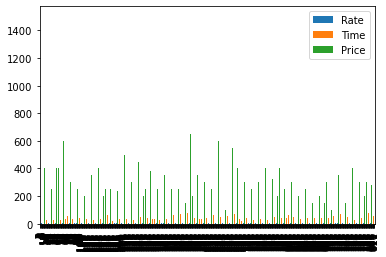

In [66]:
df.plot(kind="bar")

In [64]:
df4 = df.groupby(['Famous_Food','Location'])['Rate'].agg({'mean','min','max'})
df4

min      mean  max
Famous_Food     Location                      
Biryani         chennai     3.2  3.935294  4.3
                delhi       4.0  4.140000  4.3
                hyderabad   3.0  3.933333  4.5
                kochi       4.0  4.066667  4.1
                mumbai      4.0  4.070000  4.2
                pune        3.1  3.925000  4.2
                vijayawada  3.1  3.808333  4.1
Biryani,Chinese chennai     3.7  4.033333  4.3
                delhi       4.2  4.200000  4.2
                hyderabad   2.3  3.825000  4.4
                kochi       3.2  3.650000  4.1
                kolkata     3.8  3.800000  3.8
                mumbai      3.7  4.060000  4.3
                pune        3.8  3.950000  4.1
                vijayawada  3.2  3.709524  4.1
Biryani,Pizzas  chennai     4.1  4.200000  4.3
                hyderabad   4.0  4.000000  4.0
                mumbai      4.4  4.400000  4.4
Chinese         chennai     2.8  4.134483  4.5
                delhi       3.1  4.081579  4.5
                hyderabad   3.7  4.004000  4.2
                kochi       2.9  4.130769  5.0
                kolkata     4.1  4.100000  4.1
                mumbai      3.0  4.139024  4.5
                pune        3.5  4.183721  4.6
                varanasi    3.0  3.864865  4.2
                vijayawada  3.5  3.909091  4.1
Chinese,Biryani chennai     3.6  4.133333  4.5
                delhi       3.7  4.150000  4.6
                hyderabad   2.8  3.846154  4.2
                kochi       3.8  4.050000  4.2
                mumbai      3.6  4.100000  4.4
                pune        4.0  4.000000  4.0
                varanasi    3.4  3.633333  3.9
                vijayawada  3.4  3.814286  4.3
Chinese,Pizzas  hyderabad   4.1  4.100000  4.1
                mumbai      4.1  4.100000  4.1
                varanasi    4.1  4.300000  4.5
Pizzas          hyderabad   4.1  4.100000  4.1
                mumbai      4.1  4.100000  4.1
                pune        4.4  4.400000  4.4
                varanasi    4.1  4.100000  4.1
                vijayawada  4.1  4.100000  4.1
Pizzas,Chinese  pune        4.1  4.100000  4.1
                varanasi    3.5  3.800000  4.1
South Indian    chennai     3.7  4.244928  4.8
                delhi       2.9  4.082927  4.5
                hyderabad   2.5  3.885000  4.3
                kochi       3.3  4.113889  4.5
                kolkata     3.8  3.800000  3.8
                mumbai      3.4  4.107547  4.9
                pune        3.1  4.078261  4.6
                varanasi    2.1  3.893333  4.2
                vijayawada  2.4  3.880000  4.3

In [65]:
df3 = df.groupby(['Restaurents_Type','Location'])['Rate'].agg({'mean','min','max'})
df3

min      mean  max
Restaurents_Type          Location                      
North Indian              chennai     4.2  4.250000  4.3
                          delhi       4.2  4.233333  4.3
                          hyderabad   4.3  4.300000  4.3
                          mumbai      4.2  4.233333  4.3
                          pune        4.0  4.100000  4.2
North Indian,South Indian chennai     3.7  4.184848  4.5
                          delhi       3.7  4.100000  4.5
                          hyderabad   3.0  3.907317  4.3
                          kochi       2.9  3.925000  4.5
                          kolkata     4.1  4.100000  4.1
                          mumbai      3.0  4.103448  4.9
                          pune        3.2  4.158333  4.6
                          varanasi    3.0  3.954839  4.5
                          vijayawada  3.2  3.728571  4.1
South Indian              chennai     2.8  4.131461  4.8
                          delhi       2.9  4.045455  4.5
                          hyderabad   2.3  3.886585  4.5
                          kochi       3.2  4.092308  4.5
                          kolkata     3.8  3.800000  3.8
                          mumbai      3.3  4.105479  4.9
                          pune        3.1  4.079167  4.6
                          varanasi    2.1  3.773913  4.1
                          vijayawada  2.4  3.855882  4.2
South Indian,North Indian chennai     3.7  4.210000  4.5
                          delhi       3.7  4.166667  4.6
                          hyderabad   3.4  3.978947  4.2
                          kochi       4.0  4.227273  5.0
                          mumbai      4.0  4.164286  4.4
                          pune        3.5  4.100000  4.6
                          varanasi    3.3  3.866667  4.1
                          vijayawada  3.4  3.858824  4.3

# DATA VISUALIZATION

## Count Plot

### Count Plot of Various Locatinos

min      mean  max
North_Indian_food Location                      
No                chennai     2.8  4.131461  4.8
                  delhi       2.9  4.045455  4.5
                  hyderabad   2.3  3.886585  4.5
                  kochi       3.2  4.092308  4.5
                  kolkata     3.8  3.800000  3.8
                  mumbai      3.3  4.105479  4.9
                  pune        3.1  4.079167  4.6
                  varanasi    2.1  3.773913  4.1
                  vijayawada  2.4  3.855882  4.2
yes               chennai     3.7  4.196364  4.5
                  delhi       3.7  4.132558  4.6
                  hyderabad   3.0  3.941935  4.3
                  kochi       2.9  4.100000  5.0
                  kolkata     4.1  4.100000  4.1
                  mumbai      3.0  4.130435  4.9
                  pune        3.2  4.139623  4.6
                  varanasi    3.0  3.940541  4.5
                  vijayawada  3.2  3.786842  4.3

min      mean  max
Famous_Food     Location                      
Biryani         chennai     3.2  3.935294  4.3
                delhi       4.0  4.140000  4.3
                hyderabad   3.0  3.933333  4.5
                kochi       4.0  4.066667  4.1
                mumbai      4.0  4.070000  4.2
                pune        3.1  3.925000  4.2
                vijayawada  3.1  3.808333  4.1
Biryani,Chinese chennai     3.7  4.033333  4.3
                delhi       4.2  4.200000  4.2
                hyderabad   2.3  3.825000  4.4
                kochi       3.2  3.650000  4.1
                kolkata     3.8  3.800000  3.8
                mumbai      3.7  4.060000  4.3
                pune        3.8  3.950000  4.1
                vijayawada  3.2  3.709524  4.1
Biryani,Pizzas  chennai     4.1  4.200000  4.3
                hyderabad   4.0  4.000000  4.0
                mumbai      4.4  4.400000  4.4
Chinese         chennai     2.8  4.134483  4.5
                delhi       3.1  4.081579  4.5
                hyderabad   3.7  4.004000  4.2
                kochi       2.9  4.130769  5.0
                kolkata     4.1  4.100000  4.1
                mumbai      3.0  4.139024  4.5
                pune        3.5  4.183721  4.6
                varanasi    3.0  3.864865  4.2
                vijayawada  3.5  3.909091  4.1
Chinese,Biryani chennai     3.6  4.133333  4.5
                delhi       3.7  4.150000  4.6
                hyderabad   2.8  3.846154  4.2
                kochi       3.8  4.050000  4.2
                mumbai      3.6  4.100000  4.4
                pune        4.0  4.000000  4.0
                varanasi    3.4  3.633333  3.9
                vijayawada  3.4  3.814286  4.3
Chinese,Pizzas  hyderabad   4.1  4.100000  4.1
                mumbai      4.1  4.100000  4.1
                varanasi    4.1  4.300000  4.5
Pizzas          hyderabad   4.1  4.100000  4.1
                mumbai      4.1  4.100000  4.1
                pune        4.4  4.400000  4.4
                varanasi    4.1  4.100000  4.1
                vijayawada  4.1  4.100000  4.1
Pizzas,Chinese  pune        4.1  4.100000  4.1
                varanasi    3.5  3.800000  4.1
South Indian    chennai     3.7  4.244928  4.8
                delhi       2.9  4.082927  4.5
                hyderabad   2.5  3.885000  4.3
                kochi       3.3  4.113889  4.5
                kolkata     3.8  3.800000  3.8
                mumbai      3.4  4.107547  4.9
                pune        3.1  4.078261  4.6
                varanasi    2.1  3.893333  4.2
                vijayawada  2.4  3.880000  4.3

min      mean  max
Restaurents_Type          Location                      
North Indian              chennai     4.2  4.250000  4.3
                          delhi       4.2  4.233333  4.3
                          hyderabad   4.3  4.300000  4.3
                          mumbai      4.2  4.233333  4.3
                          pune        4.0  4.100000  4.2
North Indian,South Indian chennai     3.7  4.184848  4.5
                          delhi       3.7  4.100000  4.5
                          hyderabad   3.0  3.907317  4.3
                          kochi       2.9  3.925000  4.5
                          kolkata     4.1  4.100000  4.1
                          mumbai      3.0  4.103448  4.9
                          pune        3.2  4.158333  4.6
                          varanasi    3.0  3.954839  4.5
                          vijayawada  3.2  3.728571  4.1
South Indian              chennai     2.8  4.131461  4.8
                          delhi       2.9  4.045455  4.5
                          hyderabad   2.3  3.886585  4.5
                          kochi       3.2  4.092308  4.5
                          kolkata     3.8  3.800000  3.8
                          mumbai      3.3  4.105479  4.9
                          pune        3.1  4.079167  4.6
                          varanasi    2.1  3.773913  4.1
                          vijayawada  2.4  3.855882  4.2
South Indian,North Indian chennai     3.7  4.210000  4.5
                          delhi       3.7  4.166667  4.6
                          hyderabad   3.4  3.978947  4.2
                          kochi       4.0  4.227273  5.0
                          mumbai      4.0  4.164286  4.4
                          pune        3.5  4.100000  4.6
                          varanasi    3.3  3.866667  4.1
                          vijayawada  3.4  3.858824  4.3

In [47]:
df['Location'].describe()

count         813
unique          9
top       chennai
freq          144
Name: Location, dtype: object

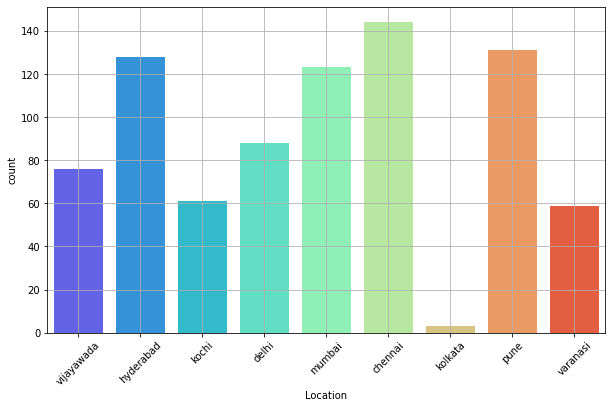

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["Location"],palette="rainbow")
plt.xticks(rotation=45)
plt.grid()
plt.show()


### Visualizing North Indian_food

In [1]:
plt.figure(figsize=(6,6))
sns.countplot(x=df["North_Indian_food"],hue=df["Location"])
plt.xticks(rotation=45)
plt.grid()
plt.show()


NameError: name 'plt' is not defined

### Visualizing Famous_Food

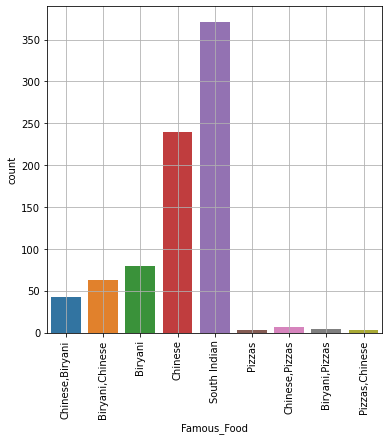

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x=df["Famous_Food"])
plt.xticks(rotation=90)
plt.grid()
plt.show()


### Visualizing_Restaurents_Type

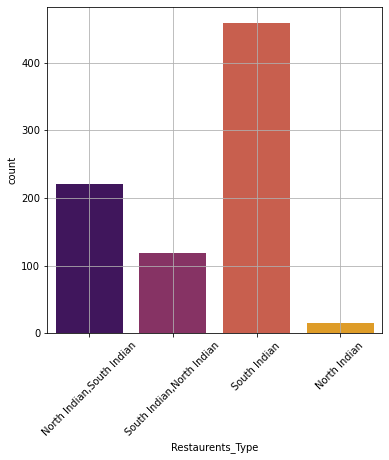

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(x=df["Restaurents_Type"],palette = "inferno")
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Pie Chart

### Pie Chart of Various Locatinos

In [52]:
df.Location.value_counts()

chennai       144
pune          131
hyderabad     128
mumbai        123
delhi          88
vijayawada     76
kochi          61
varanasi       59
kolkata         3
Name: Location, dtype: int64

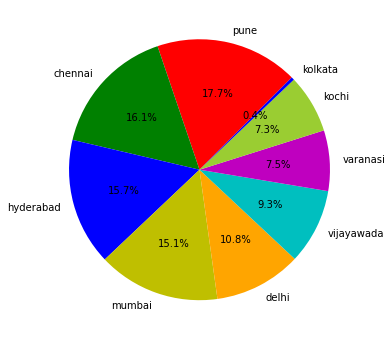

In [53]:
plt.figure(figsize=(12,6))
colors = ['r','g','b','y',"orange","c","m","yellowgreen","b"]
label=["pune","chennai","hyderabad","mumbai","delhi","vijayawada","varanasi","kochi","kolkata"]
plt.pie(df['Location'].value_counts().iloc[:9],labels=label,startangle=45,colors=colors,autopct='%1.1f%%')
plt.show()

* A pie chart is the most common way used to visualize the numerical proportion occupied by each of the categories.
* Use the plt.pie() function to plot a pie chart. Since the categories are equally distributed, divide the sections in the pie chart is equally. Then add the labels by passing the array of values to the ‘labels’parameters.
* A random sample can be created using the DataFrame.sample( ) function. The frac parameter of sample() function indicates the fraction of axis items to return.
* The ‘startangle’ parameter of the pie() function rotates everything counter-clockwise at a specific angle.
* Further, the default value for startangle is 0. The ‘autopct’ parameter enables one to display the percentagevalue using Python string formatting.

### Hist Plot

### Hist Plot of Time

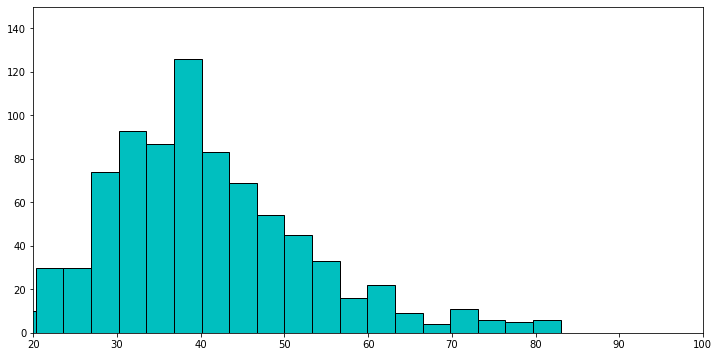

In [54]:
plt.figure(figsize=(12,6))
plt.hist(df['Time'],bins=20,color="c",edgecolor='k')
plt.xlim((20,100))
plt.ylim((0,150))
plt.show()


### Hist Plot of Rate

(array([  1.,   1.,   2.,   0.,   4.,   2.,   9.,   5.,  15.,  20.,  18.,
         80.,  47., 367.,  81., 126.,  23.,   8.,   1.,   3.]),
 array([2.1  , 2.245, 2.39 , 2.535, 2.68 , 2.825, 2.97 , 3.115, 3.26 ,
        3.405, 3.55 , 3.695, 3.84 , 3.985, 4.13 , 4.275, 4.42 , 4.565,
        4.71 , 4.855, 5.   ]),
 <BarContainer object of 20 artists>)

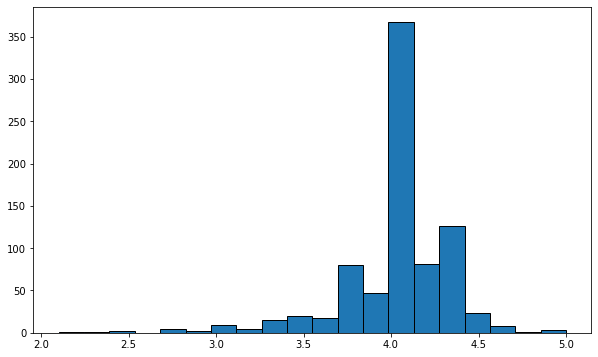

In [55]:
plt.figure(figsize=(10,6))
plt.hist(df["Rate"],bins=20,edgecolor="k")

### Hist Plot of Price

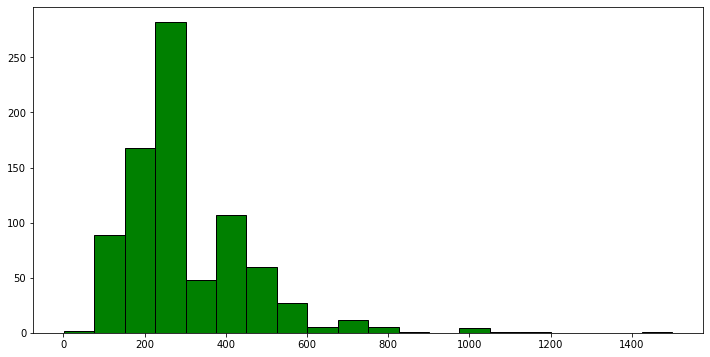

In [80]:
plt.figure(figsize=(12,6))
plt.hist(df['Price'],bins=20,color="g",edgecolor='k');


* Histograms are similar to bar charts which display the counts or relative frequencies of values falling in different class intervals or ranges. A histogram displays the shape and spread of continuous sample data.
* It also helps us understand the skewness and kurtosis of the distribution of the data.Plotting histogram using the matplotlib plt.hist() function

### distribution plot Price

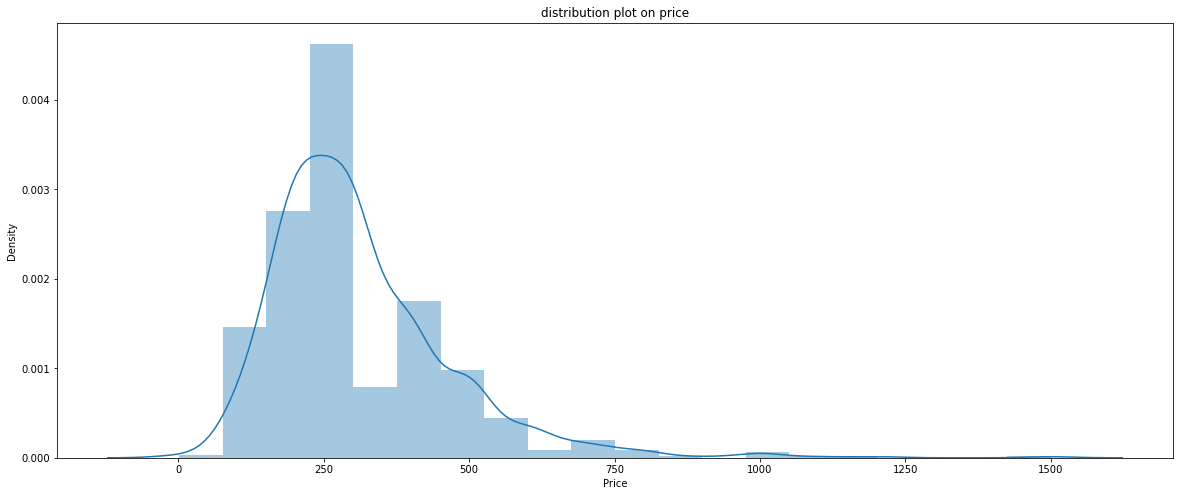

In [57]:
plt.figure(figsize=(20,8))
sns.distplot(df['Price'],bins=20)
plt.title('distribution plot on price')
plt.show()

### distribution plot Time

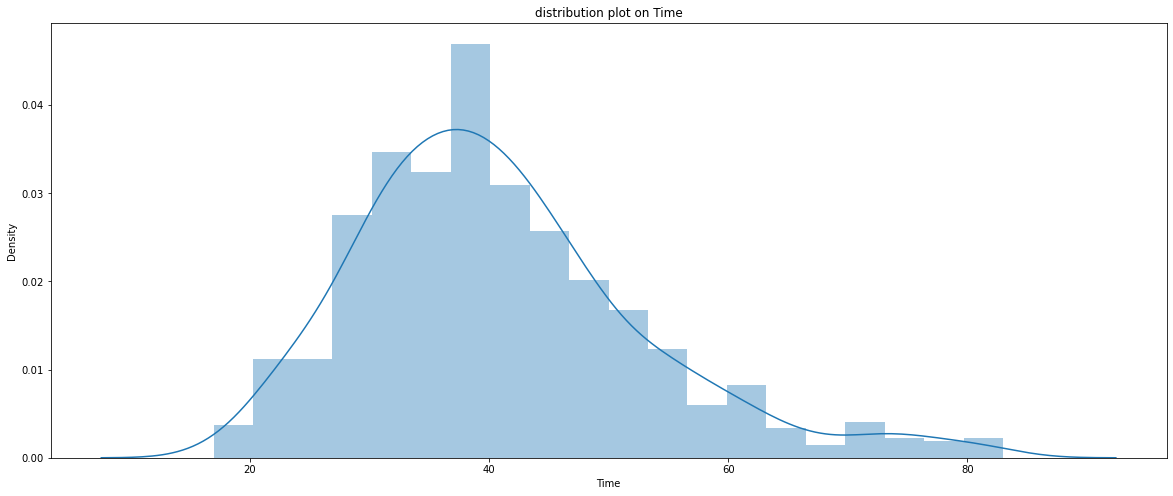

In [58]:
plt.figure(figsize=(20,8))
sns.distplot(df['Time'],bins=20)
plt.title('distribution plot on Time')
plt.show()

* The distplot() function of seaborn library was earlier mentioned under rug plot section. This function combines the matplotlib hist() function with the seaborn kdeplot() and rugplot() functions.

### Box Plot

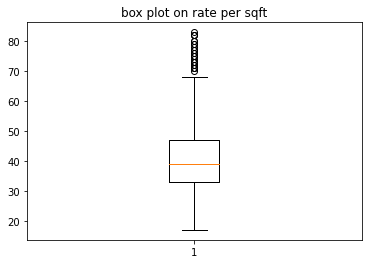

In [59]:
plt.boxplot(df['Time'])
plt.title('box plot on rate per sqft')
plt.show()

# BIVARIATE ANALYSIS

## BAR PLOT

### Visualizing Price Vs Rate

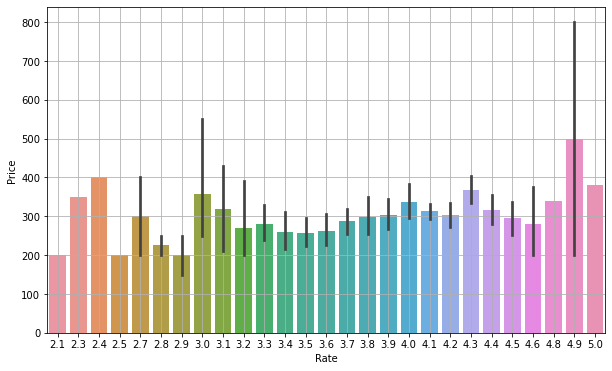

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Rate"],y=df["Price"])
plt.grid()
plt.show()


* When comparing several quantities and when changing one variable, we might want a bar chart where we have bars of one color for one quantity value.
* A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

* A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

### Visualizing Loaction Vs Price

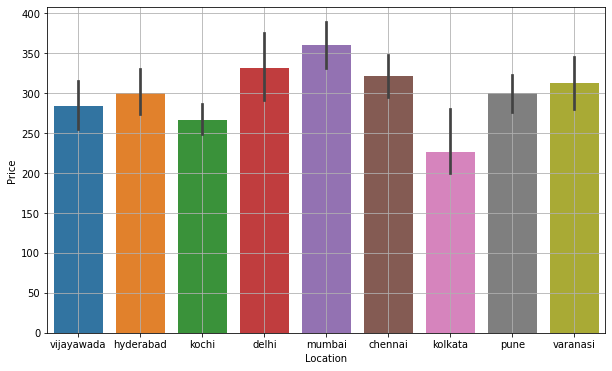

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Location"],y=df["Price"])
plt.grid()
plt.show()


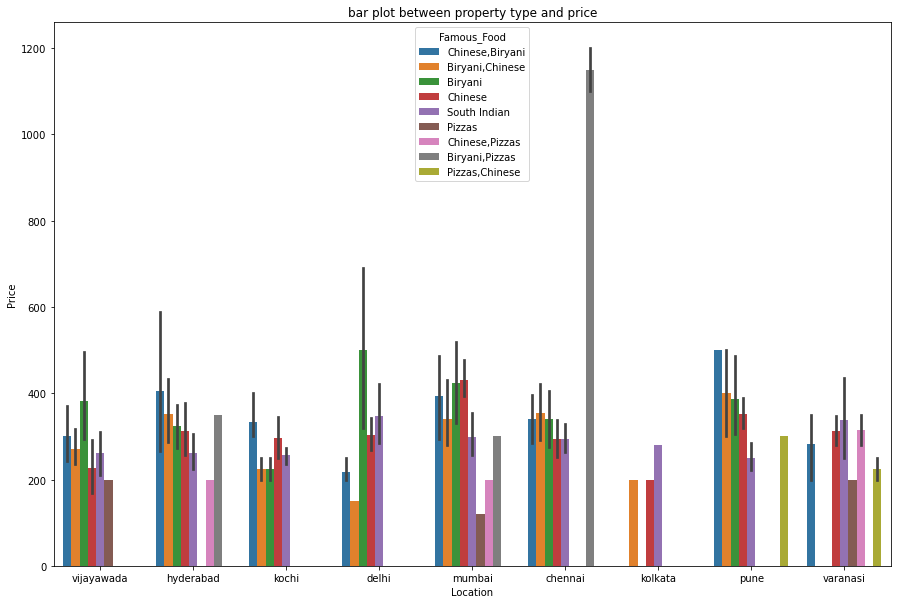

In [62]:
plt.figure(figsize=(15,10))
sns.barplot(x='Location',y='Price',hue="Famous_Food",data=df)
plt.title('bar plot between property type and price')
plt.show()

## Line chart

### Visualizing Rate vs Price

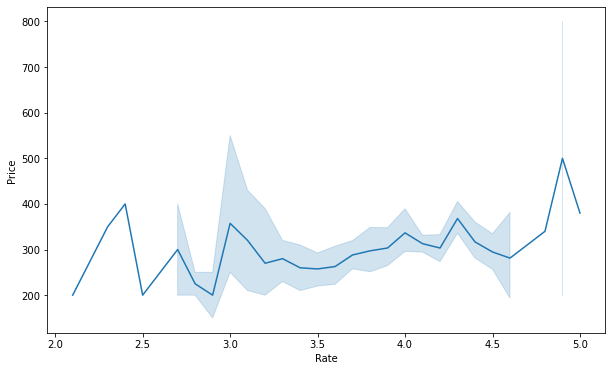

In [63]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Rate',y='Price',data=df)
plt.show()

* A line chart uses points connected by line segments from left to right to demonstrate changes in value. The horizontal axis depicts a continuous progression, often that of time, while the vertical axis reports values for a metric of interest across that progression.
* You will use a line chart when you want to emphasize changes in values for one variable (plotted on the vertical axis) for continuous values of a second variable (plotted on the horizontal). This emphasis on patterns of change is sold by line segments moving consistently from left to right and observing the slopes of the lines moving up or down


## scatter plot

### Visualizing Rate vs Time

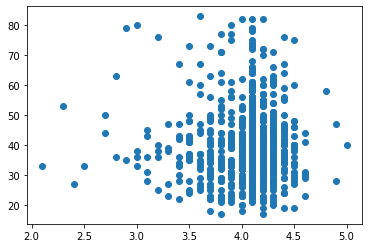

In [64]:
plt.scatter(x='Rate',y='Time',data=df)
plt.show()

* Scatter plots’ primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.

* Identification of correlational relationships are common with scatter plots. In these cases, we want to know, if we were given a particular horizontal value, what a good prediction would be for the vertical value. You will often see the variable on the horizontal axis denoted an independent variable, and the variable on the vertical axis the dependent variable. Relationships between variables can be described in many ways: positive or negative, strong or weak, linear or nonlinear.

## pair plot

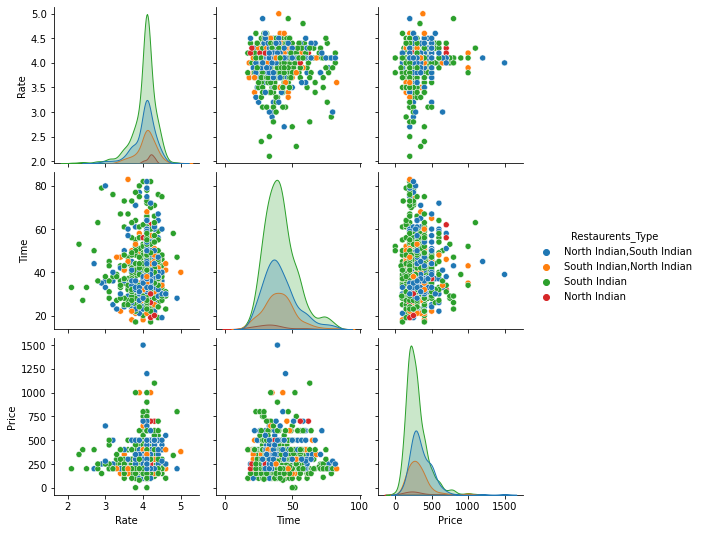

In [65]:
sns.pairplot(data=df,hue='Restaurents_Type')
plt.show()

* Pairs plots are a powerful tool to quickly explore distributions and relationships in a dataset. Seaborn provides a simple default method for making pair plots that can be customized and extended through the Pair Grid class. In a data analysis project, a major portion of the value often comes not in the flashy machine learning, but in the straightforward visualization of data.

## Box Plot 

### Visualizing North_indian_Food Vs Rate

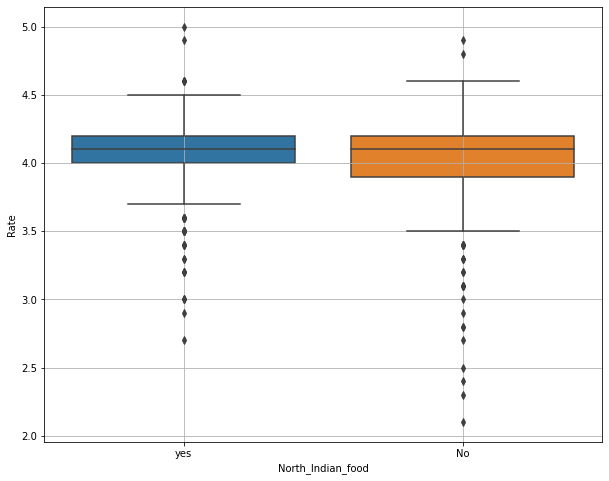

In [66]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df["North_Indian_food"],y=df["Rate"])
plt.grid()
plt.show()

* A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

### Visualizing Famous_Food VS Rate

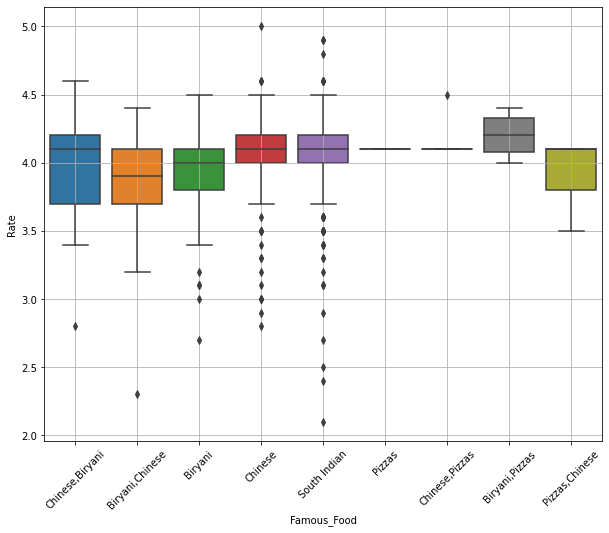

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df["Famous_Food"],y=df["Rate"])
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Visualizing Restaurents_Type VS Rate

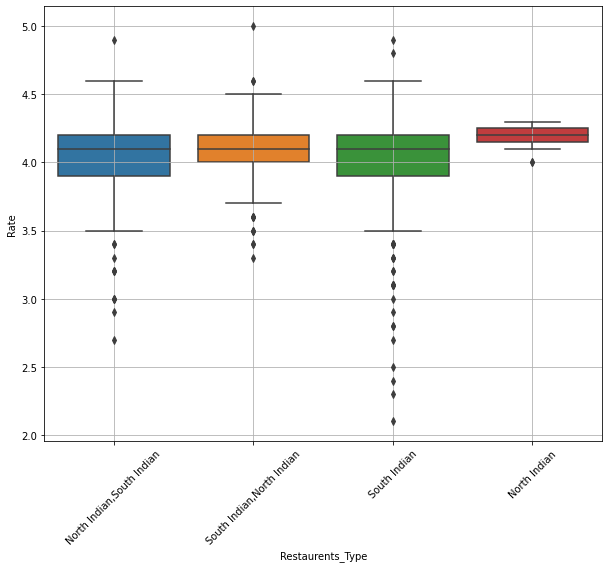

In [68]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df["Restaurents_Type"],y=df["Rate"])
plt.xticks(rotation=45)
plt.grid()
plt.show()

* A box-plot is a very useful and standardized way of displaying the distribution of data based on a fivenumber summary (minimum, first quartile, second quartile(median), third quartile, maximum). It helps in understanding these parameters of the distribution of data and is extremely helpful in detecting outliers.
* Since the box plot is for continuous variables, firstly create a data frame without the column ‘variety’. Then drop the column from the DataFrame using the drop( ) function and specify axis=1 to indicate it.

## Violinplot

### Visualizing Restaurents_Type VS Rate

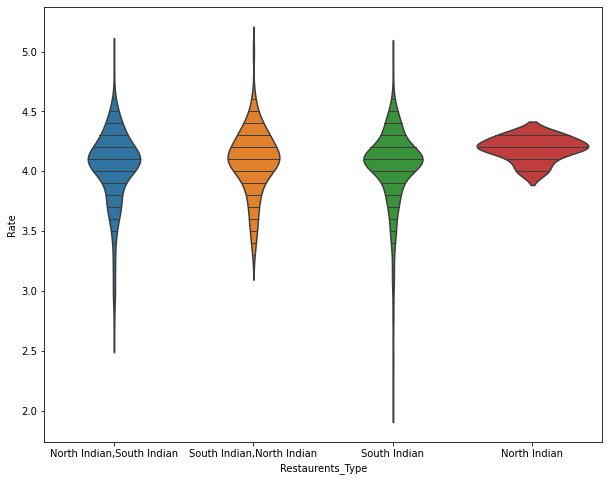

In [69]:
plt.figure(figsize=(10,8))
sns.violinplot(x=df["Restaurents_Type"],y=df["Rate"],inner="stick")
plt.show()

* The Violin plot is very much similar to a box plot, with the addition of a rotated kernel density plot on eachside. It shows the distribution of quantitative data across several levels of one (or more) categoricalvariables such that those distributions can be compared.
* We use plt.violinplot( ) function. The Boolean parameter ‘showmedians’ is set to True, due to which themedians are marked for every variable. The violin plot helps to understand the estimated density of the variable.

## regplot

### Visualizing Price VS Rate

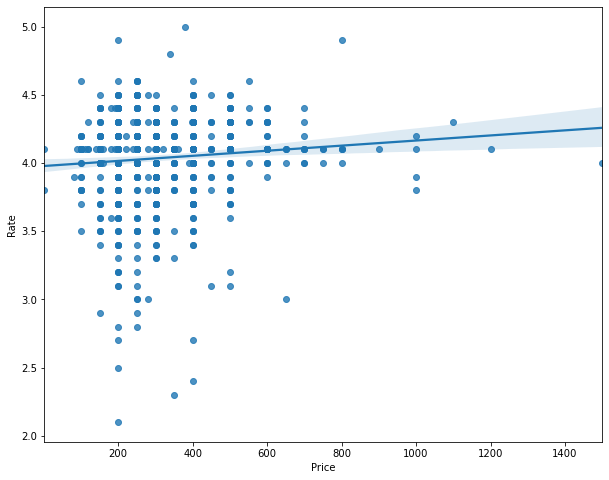

In [70]:
plt.figure(figsize=(10,8))
sns.regplot(x=df["Price"],y=df["Rate"])
plt.show()

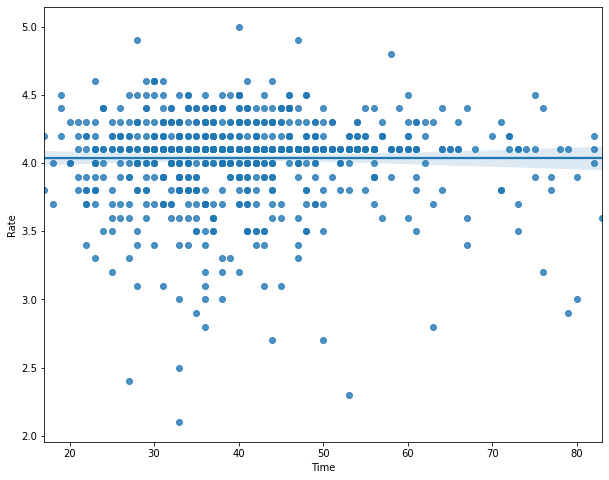

In [71]:
plt.figure(figsize=(10,8))
sns.regplot(x=df["Time"],y=df["Rate"])
plt.show()

* A rug plot is a very simple, but also an ideal legitimate, way of representing a distribution. It consists ofvertical lines at each data point. Here, the height is arbitrary. The density of the distribution can be knownby how dense the tick-marks are.
* The connection between the rug plot and histogram is very direct: a histogram just creates bins along withthe range of the data and then draws a bar with height equal to the number of ticks in each bin. 
* In a rugplot, all of the data points are plotted on a single axis, one tick mark or line for each one.Compared to a marginal histogram, the rug plot suffers somewhat in terms of readability of thedistribution, but it is more compact in its representation of the data. A rug is a very short, long display ofpoint symbols, one for each distinct value. Often a vertical pipe symbol | is used to minimize overlap.  
* Rugplot may not be considered as a primary plot choice, but it can be a good supporter plot in certain circumstances.

## Multivariate plot

## Heat map

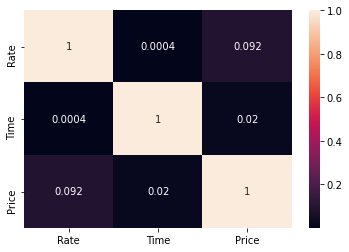

In [72]:
sns.heatmap(df.corr(), annot=True)
plt.show()

* Heatmaps visualize the data in 2-D colored maps making use of color variations like hue, saturation, or luminance. Heatmaps describe relationships between variables in form of colors instead of numbers.
* These variables are plotted on both axes. The color changes describe the relationship between two values according to the intensity of the color in a particular block. 




### Visualizing North_indian_Food, Location wise

In [73]:
df2 = df.groupby(['Location','North_Indian_food'])['Name'].count()
df2.to_csv('location_North Indian.csv')
df2 = pd.read_csv('location_North Indian.csv')
df2 = pd.pivot_table(df2, values=None, index=['Location'], columns=['North_Indian_food'], fill_value=0, aggfunc=np.sum)
df2

Name    
North_Indian_food   No yes
Location                  
chennai             86  58
delhi               47  41
hyderabad           82  46
kochi               41  20
kolkata              2   1
mumbai              72  51
pune                72  59
varanasi            22  37
vijayawada          35  41

<AxesSubplot:xlabel='Location'>

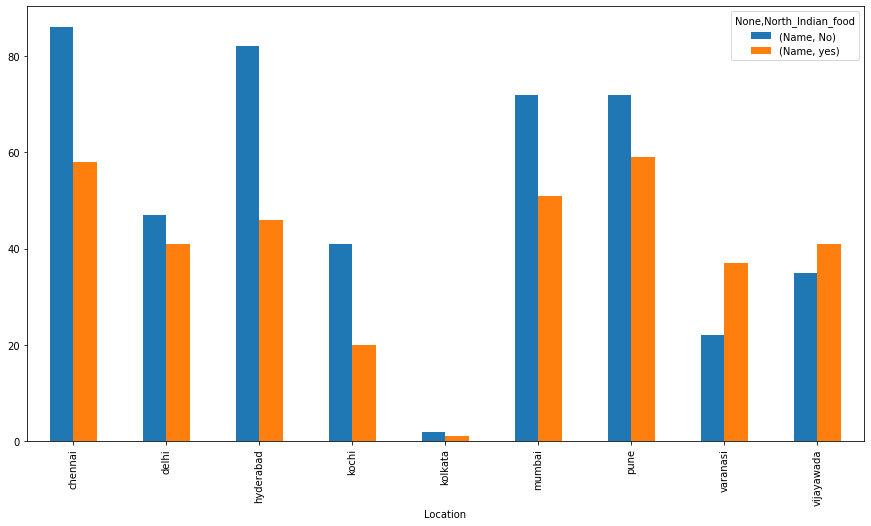

In [74]:
df2.plot(kind = "bar",figsize=(15,8))

### Visualizing Restaurents_Type, Location wise

In [75]:
df3 = df.groupby(['Location','Restaurents_Type'])['Name'].count()
df3.to_csv('location_Restaurents_Type.csv')
df3 = pd.read_csv('location_Restaurents_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['Location'], columns=['Restaurents_Type'], fill_value=0, aggfunc=np.sum)
df3

Name                                         \
Restaurents_Type North Indian North Indian,South Indian South Indian   
Location                                                               
chennai                     3                        32           86   
delhi                       3                        24           47   
hyderabad                   2                        28           82   
kochi                       0                         8           41   
kolkata                     0                         1            2   
mumbai                      3                        33           72   
pune                        4                        41           72   
varanasi                    0                        31           22   
vijayawada                  0                        23           35   

                                            
Restaurents_Type South Indian,North Indian  
Location                                    
chennai                                 23  
delhi                                   14  
hyderabad                               16  
kochi                                   12  
kolkata                                  0  
mumbai                                  15  
pune                                    14  
varanasi                                 6  
vijayawada                              18

<AxesSubplot:xlabel='Location'>

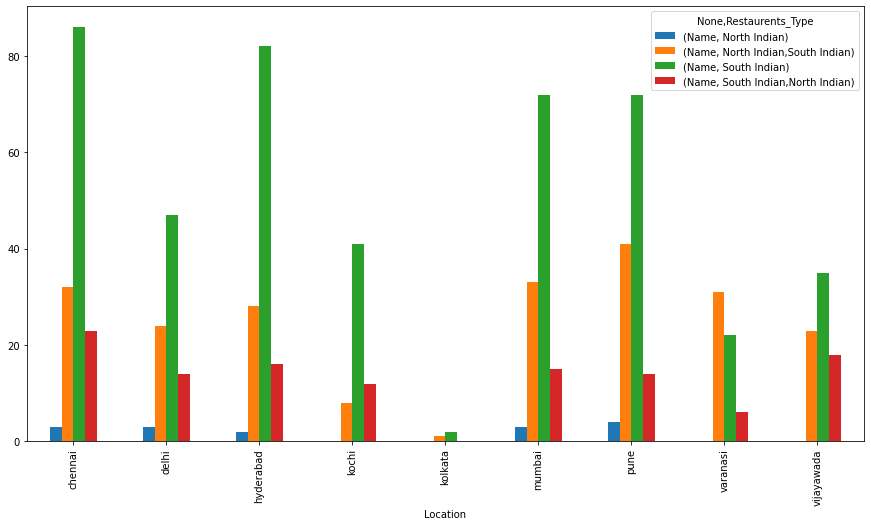

In [76]:
df3.plot(kind = "bar",figsize=(15,8))

### Visualizing Famous_Food,Locations Wise

In [77]:
df4 = df.groupby(['Location','Famous_Food'])['Name'].count()
df4.to_csv('location_Famous_Food.csv')
df4 = pd.read_csv('location_Famous_Food.csv')
df4 = pd.pivot_table(df4, values=None, index=['Location'], columns=['Famous_Food'], fill_value=0, aggfunc=np.sum)
df4

Name                                                         \
Famous_Food Biryani Biryani,Chinese Biryani,Pizzas Chinese Chinese,Biryani   
Location                                                                     
chennai          17              16              2      25              10   
delhi             5               1              0      37               3   
hyderabad        19              15              1      24               9   
kochi             4               2              0      15               3   
kolkata           0               1              0       1               0   
mumbai           11               5              1      43               7   
pune              9               2              0      46               1   
varanasi          0               0              0      38               3   
vijayawada       14              21              0      11               7   

                                                               
Famous_Food Chinese,Pizzas Pizzas Pizzas,Chinese South Indian  
Location                                                       
chennai                  0      0              0           74  
delhi                    0      0              0           42  
hyderabad                3      0              0           57  
kochi                    0      0              0           37  
kolkata                  0      0              0            1  
mumbai                   2      1              0           53  
pune                     0      0              1           72  
varanasi                 2      1              2           13  
vijayawada               0      1              0           22

<AxesSubplot:xlabel='Location'>

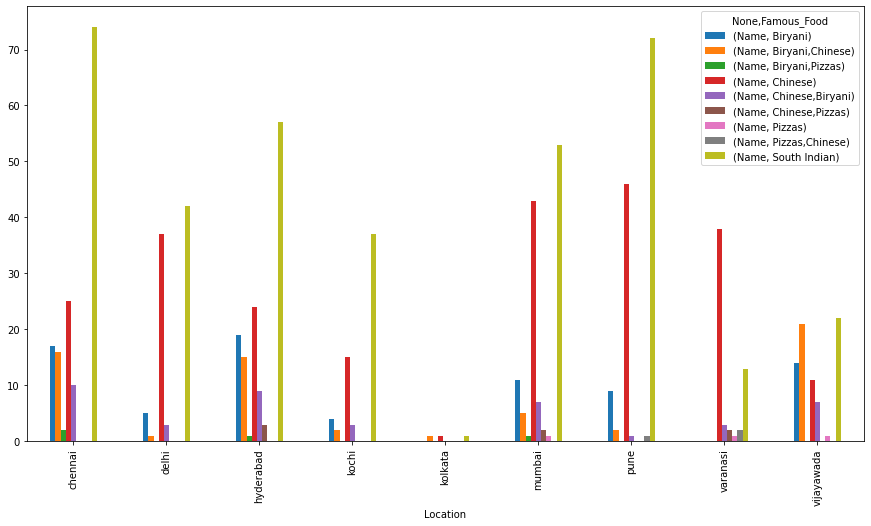

In [78]:
df4.plot(kind = "bar",figsize=(15,8))

## Bar plot

<AxesSubplot:>

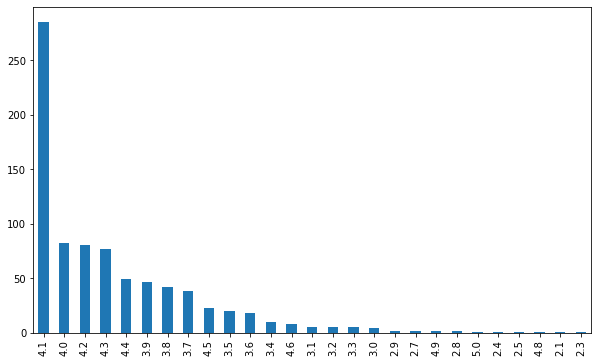

In [79]:
df['Rate'].value_counts().plot(kind = 'bar',figsize=(10,6))

* A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle. The length and heights of the bar chart represent the data distributed in the dataset. In a bar chart, we have one axis representing a particular category of a column in the dataset and another axis representing the values or counts associated with it.  Bar charts can be plotted vertically or horizontally. A vertical bar chart is often called a column chart. When we arrange bar charts in a high to low-value counts manner, we called them Pareto charts.

